In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv("./train2.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
y = df["class"].values.reshape(-1, 1)
X = df.drop(columns=["class"]).values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

In [6]:
dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [7]:
dt_classifier.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


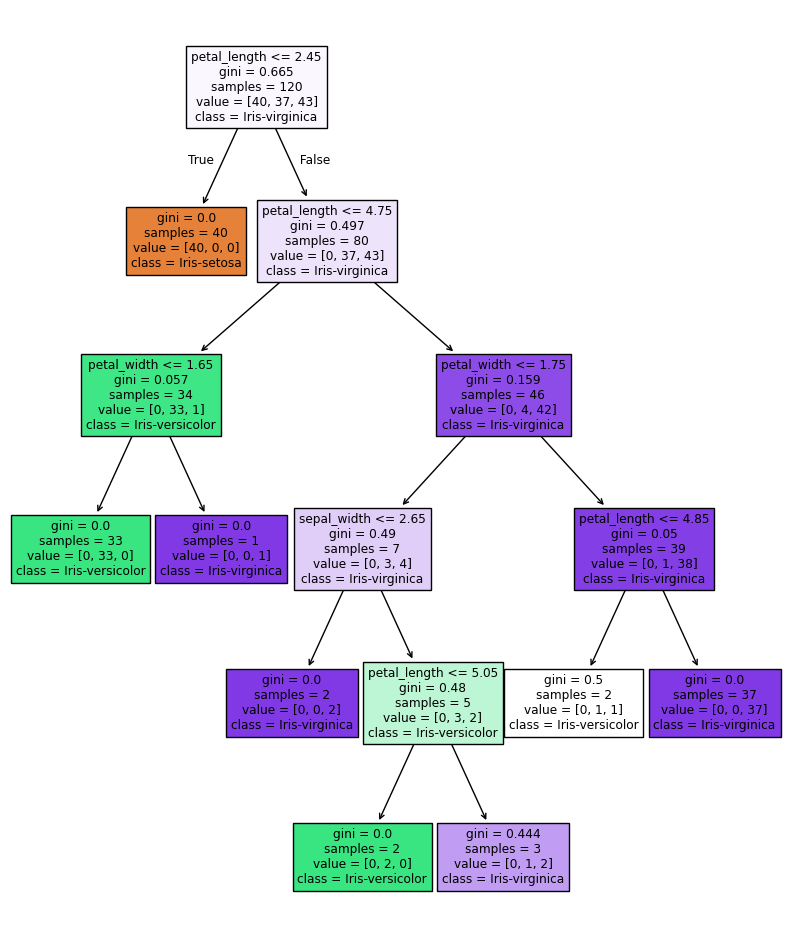

In [8]:
figure = plt.figure(figsize=(10, 12))
plot_tree(dt_classifier, feature_names=df.drop("class", axis=1).columns, class_names=["Iris-setosa", "Iris-versicolor", "Iris-virginica"], filled=True)
plt.show()

In [9]:
y_pred = dt_classifier.predict(X_test)

In [10]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0, 12,  1],
       [ 0,  1,  6]])

In [11]:
accuracy_score(y_test, y_pred)

0.9333333333333333

In [12]:
f1_score(y_test, y_pred, average='micro')

0.9333333333333333

In [13]:
y_train_pred = dt_classifier.predict(X_train)

In [14]:
accuracy_score(y_train, y_train_pred), f1_score(y_train, y_train_pred, average='macro')

(0.9833333333333333, 0.9832390530064948)